In [1]:
import pathlib
import dill
import pickle
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
path = pathlib.Path('exp_results')
files = list(path.glob("*.dill"))

In [4]:
def parse_file(f):
    split_name = f.name.split("_")
    noise = float(split_name[1])
    dt = float(split_name[-1][:-5])
    with open(f,'rb') as path:
        result = pickle.load(path)
    d = result['coeff_mets']
    d.update(result['data_mets'])
    d['noise'] = np.around(np.array(noise),3)
    d['dt'] = np.around(np.array(dt),3)
    return d

In [5]:
results = [parse_file(f) for f in files]

In [6]:
df = pd.DataFrame(results)
df = df.astype('float')

In [7]:
df

,precision,recall,f1,coeff_rel_l2,coeff_rmse,coeff_mae,mse,rmse,mae,max_abs_error,normalized_mse,relative_l2_error,noise,dt
0,0.315789,0.857143,0.461538,2.760696e+00,15.891883,7.386704e+00,4.885811e+03,69.898578,42.213684,427.881554,1.255881e+00,1.120482e+00,20.0,0.20
1,0.583333,1.000000,0.736842,4.691556e-01,2.700684,6.916868e-01,3.224391e+01,5.678372,4.504046,19.759320,8.288187e-03,9.102497e-02,8.0,0.14
2,1.000000,1.000000,1.000000,4.512925e-07,0.000003,7.961598e-07,1.390901e-09,0.000037,0.000027,0.000146,3.575264e-13,5.978398e-07,0.0,0.10
3,0.333333,0.714286,0.454545,9.041884e-01,5.204941,2.583629e+00,9.155121e+02,30.257432,15.691307,334.333965,2.353293e-01,4.850302e-01,18.0,0.10
4,0.400000,0.857143,0.545455,1.291448e+00,7.434193,3.623369e+00,3.598839e+04,189.706073,125.324203,1129.345682,9.250695e+00,3.041011e+00,20.0,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.777778,1.000000,0.875000,1.432755e-01,0.824762,2.524729e-01,4.070652e+01,6.380166,4.500227,27.381677,1.046347e-02,1.022748e-01,18.0,0.04
106,0.545455,0.857143,0.666667,1.776466e+00,10.226186,3.371005e+00,2.390398e+02,15.460912,12.283998,53.292448,6.144437e-02,2.478402e-01,6.0,0.20
107,1.000000,1.000000,1.000000,4.179895e-07,0.000002,7.105483e-07,2.190603e-10,0.000015,0.000010,0.000104,5.630870e-14,2.372567e-07,0.0,0.12
108,0.352941,0.857143,0.500000,1.024074e+00,5.895057,2.777628e+00,2.730783e+03,52.256894,29.619575,559.129176,7.019385e-01,8.376841e-01,16.0,0.12


<Axes: xlabel='noise', ylabel='dt'>

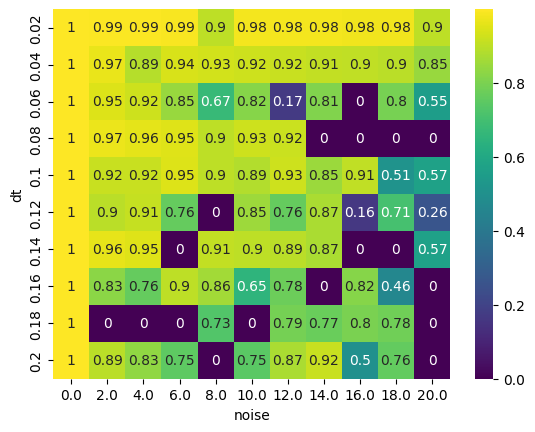

In [10]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='relative_l2_error')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")


<Axes: xlabel='noise', ylabel='dt'>

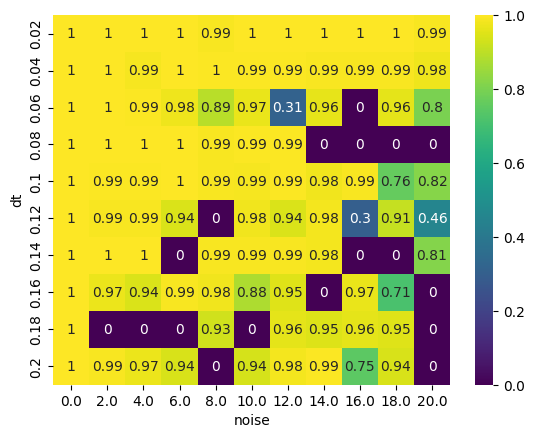

In [8]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='normalized_mse')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")


<Axes: xlabel='noise', ylabel='dt'>

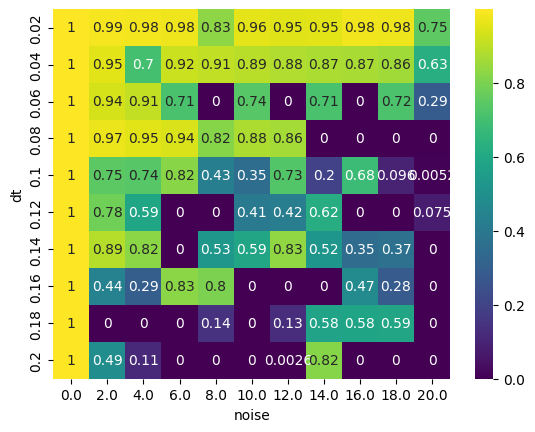

In [9]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='coeff_rel_l2')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")
